# <center>Lab Machine Learning 5</center>

## <center>Souaybou Bagayoko</center>
### <center> Semester 2, Nr: 303189 </center>



## Model : logistic regression 
## Data  : Bank Marketing dataset
### Data reading 

In [1]:
#importing the libraries 

from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 




In [2]:
Bank_data = pd.read_csv( 'bank-additional.csv', sep=';') # this is a semicolumn separedt file, 
                                                    #therefor it requires to set the delimiter = ';')

In [3]:
Bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
Bank_data.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri ...         2    999         0  nonexistent   
1  telephone   may         fri ...         4    999         0  nonexistent   
2  telephone   jun         wed ...         1    999         0  nonexistent   
3  telephone   jun         fri ...         3    999         0  nonexistent   
4   cellular   nov         mon ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [5]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [6]:
Bank_data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [7]:
Bank_data.shape

(4119, 21)

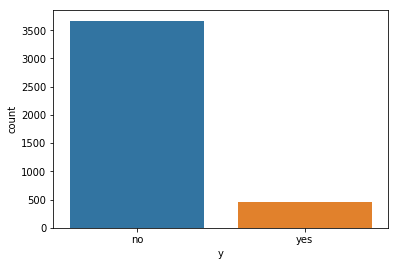

In [8]:
sns.countplot(x='y', data=Bank_data)     

In [9]:
from collections import Counter 
def dummy_check(df):
    for col in df.columns:
        if df[col].dtype=='object':
            yield col , Counter(df[col])

In [10]:
 
val =dummy_check(Bank_data)
for v in val:
    print(f"Column \033[1;32m{v[0]} \033[1;m")
    print(v[1])

Column job 
Counter({'admin.': 1012, 'blue-collar': 884, 'technician': 691, 'services': 393, 'management': 324, 'retired': 166, 'self-employed': 159, 'entrepreneur': 148, 'unemployed': 111, 'housemaid': 110, 'student': 82, 'unknown': 39})
Column marital 
Counter({'married': 2509, 'single': 1153, 'divorced': 446, 'unknown': 11})
Column education 
Counter({'university.degree': 1264, 'high.school': 921, 'basic.9y': 574, 'professional.course': 535, 'basic.4y': 429, 'basic.6y': 228, 'unknown': 167, 'illiterate': 1})
Column default 
Counter({'no': 3315, 'unknown': 803, 'yes': 1})
Column housing 
Counter({'yes': 2175, 'no': 1839, 'unknown': 105})
Column loan 
Counter({'no': 3349, 'yes': 665, 'unknown': 105})
Column contact 
Counter({'cellular': 2652, 'telephone': 1467})
Column month 
Counter({'may': 1378, 'jul': 711, 'aug': 636, 'jun': 530, 'nov': 446, 'apr': 215, 'oct': 69, 'sep': 64, 'mar': 48, 'dec': 22})
Column day_of_week 
Counter({'thu': 860, 'mon': 855, 'tue': 841, 'wed': 795, 'fri': 7

### some insights of the Data: Data description 

   Input variables:
   #### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 



According to the explainination in the data set :

***11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.***
There I will drop the duration column 

#### Droping columns and one hot encoding

In [11]:
Bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
# I will drop some primery columns that are not relevant for this specific classification 
todrop = ['default','contact','day_of_week', 'duration']
Bank_data = Bank_data.drop(todrop, axis=1)

In [13]:
#  now I will on hot encode the rest of the categorical data and then proceed with furthere features selection 
# First encode the prediction and set y_no as baseline and for other categorical columns i will not set a baseline 
# This is because of the regularization. 

In [14]:
dummy_data = pd.get_dummies(Bank_data, columns=['y'], drop_first=True) 


In [15]:
dummy_data = pd.get_dummies(dummy_data)

In [16]:
dummy_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_yes',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtyp

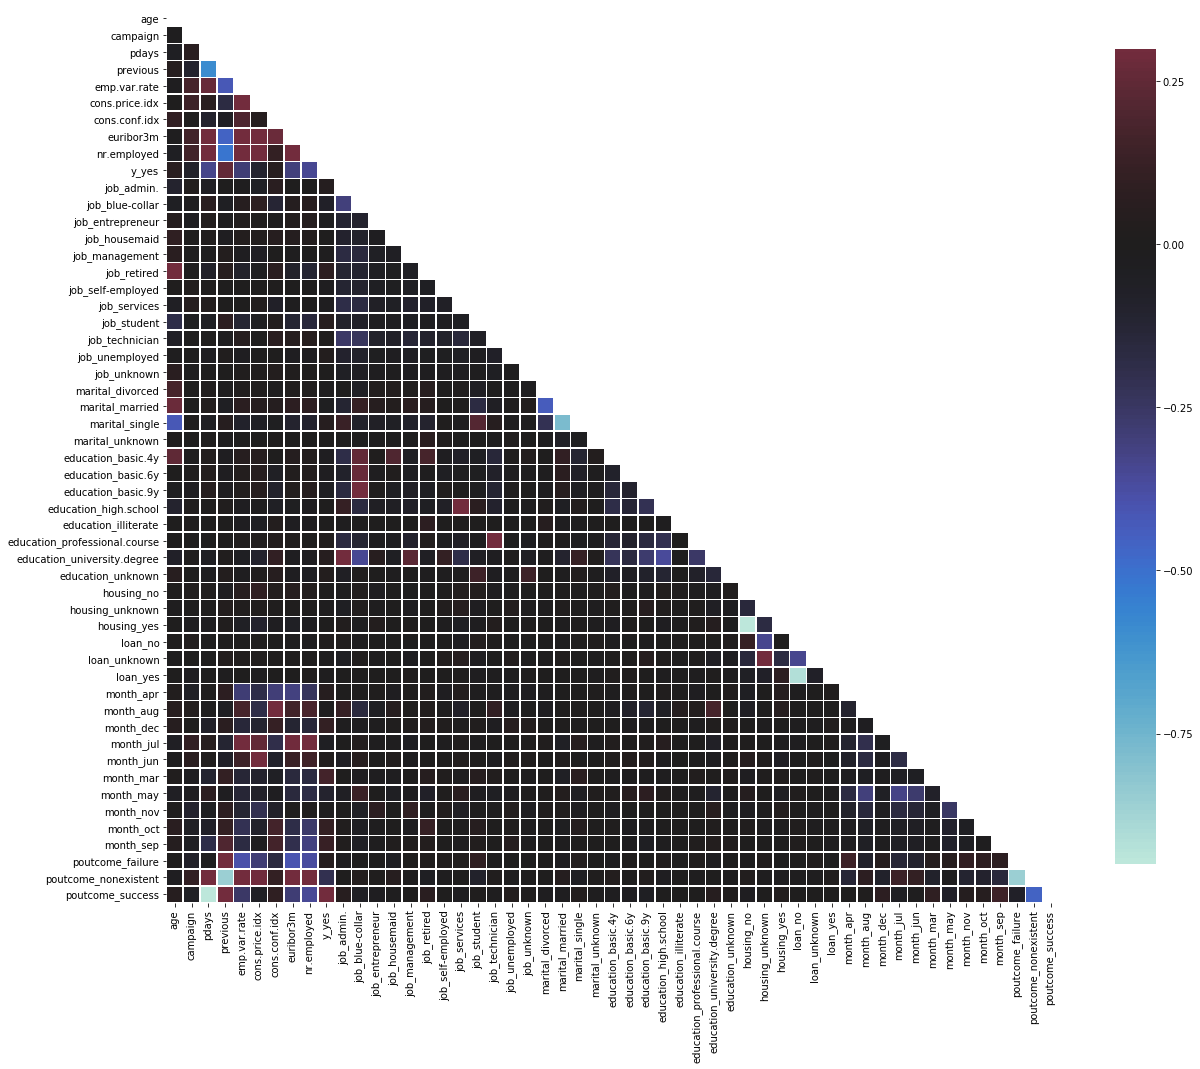

In [17]:
corr = dummy_data.corr()  # generate the cooreleation value between columns
mask = np.zeros_like(corr, dtype=np.bool) # creates matrice which contain the boolean value false
mask[np.triu_indices_from(mask)] = True  # set the upper triangle part of the triangle to true
plt.subplots(figsize=(20, 20)) # Set up the matplotlib figure
sns.heatmap(corr,annot=False, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

##### Applying the correlation 

In [18]:
dummy_data[dummy_data.columns].corr()['y_yes']

age                              0.060374
campaign                        -0.076091
pdays                           -0.332012
previous                         0.255697
emp.var.rate                    -0.283216
cons.price.idx                  -0.098326
cons.conf.idx                    0.054393
euribor3m                       -0.298565
nr.employed                     -0.349241
y_yes                            1.000000
job_admin.                       0.040082
job_blue-collar                 -0.067781
job_entrepreneur                -0.034275
job_housemaid                   -0.005036
job_management                  -0.015814
job_retired                      0.078373
job_self-employed               -0.017796
job_services                    -0.021253
job_student                      0.055781
job_technician                   0.009032
job_unemployed                   0.032872
job_unknown                     -0.002169
marital_divorced                -0.014597
marital_married                 -0

In [19]:
dummy_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_yes',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtyp

In [20]:
selected_columns = ['previous','emp.var.rate','euribor3m','nr.employed','month_dec','month_mar','month_may','month_oct',\
                  'month_sep','poutcome_nonexistent','poutcome_success','y_yes']

In [21]:
data = dummy_data[selected_columns]
data.head()

previous  emp.var.rate  euribor3m  nr.employed  month_dec  month_mar  \
0         0          -1.8      1.313       5099.1          0          0   
1         0           1.1      4.855       5191.0          0          0   
2         0           1.4      4.962       5228.1          0          0   
3         0           1.4      4.959       5228.1          0          0   
4         0          -0.1      4.191       5195.8          0          0   

   month_may  month_oct  month_sep  poutcome_nonexistent  poutcome_success  \
0          1          0          0                     1                 0   
1          1          0          0                     1                 0   
2          0          0          0                     1                 0   
3          0          0          0                     1                 0   
4          0          0          0                     1                 0   

   y_yes  
0      0  
1      0  
2      0  
3      0  
4      0

In [22]:
data[data.columns].corr()['y_yes']

previous                0.255697
emp.var.rate           -0.283216
euribor3m              -0.298565
nr.employed            -0.349241
month_dec               0.102309
month_mar               0.164775
month_may              -0.100321
month_oct               0.105684
month_sep               0.119395
poutcome_nonexistent   -0.207179
poutcome_success        0.325804
y_yes                   1.000000
Name: y_yes, dtype: float64

### Stratifying and partitioning the Data

In [23]:
# data partitoining 
def data_split_index (data, percentage, seed):
    data = data.sample(frac=1)
    train = data.sample(frac=percentage/100, random_state=seed) # taking the percentage of t
                                                                #the shuffle  data 
    tes = data.drop(train.index)                                # puttint the rest inton the 
                                                                #test data  
    return train, tes

groupe = 'y_yes'
Classe  = data.groupby(groupe)
count  = data[groupe].value_counts()
min_   = min(count.values)
a = 0
for g, _ in Classe:
    if count[g] > min_:
        g = data[data[groupe]==g].sample(frac=1)[:min_] # I select the number fix number of stradum 
    else: 
        g = data[data[groupe]==g]

    if a == 0:  
        train, tes = data_split_index(g,80,50)
    else :
        train_new, tes_new = data_split_index(g,80,50)
        train = pd.concat([train, train_new], axis=0)
        tes   = pd.concat([tes, tes_new], axis=0)
    a +=1
# I put the rest of the data into the tes data 
rest = data.drop(train.index)
rest.drop(tes.index, inplace=True)
tes   = pd.concat([tes, rest], axis=0)

In [24]:
X_train  =  train.drop('y_yes',axis=1).values
X_tes    =  tes.drop('y_yes',axis=1).values
Y_train  =  train['y_yes'].values
Y_tes    =  tes['y_yes'].values
 

Note:
In regularisation, it is import to normalize the data set before passing the model. This avoid over/underpenalize a feature due its scale

In [25]:
#----Scaling functions ------------------------ 
def Stand_dev(M):
    "this return the standart deviation the column"
    return np.sqrt(sum((M-M.mean())**2)/len(M))

def scale(X):
    "REscaling the Training dataset, this return the normilize of the columns "
    for i in range(X.shape[1]):
        mean = np.mean(X[:,[i]])
        m = min(X[:,[i]])
        ma = max(X[:,[i]])
     
        X[:,[i]] = (X[:,[i]]-mean)/Stand_dev(X[:,[i]])
 
    

In [26]:
#applying the the normilize funciton to the dataset, Here `i will only scale the Xs 
to_scale = [X_train,  X_tes]  # 
for i in to_scale:
    scale(i)

### Applying the logistic regression 

In [27]:

def minibatch(x_train, y_train, batchsize):
    "Yield minibacth with the given batchsizw"
    index = np.arange(0, len(y_train))   #a list of the dataset indexes 
    np.random.shuffle(index)
    batches = np.array_split(index, len(y_train)//batchsize) # spliting the indexes among the number of batches 
    for batche in batches:
        yield x_train[np.array(batche)], y_train[np.array(batche)] # yield the suffled data 

        
def L2reg(Theta):
    w = np.dot(Theta.T, Theta)
    #we set the offset to zero/not regularize, since it afecte only the height of the function 
    # and does not affect the complexity 
    w[0] = 0 
    return np.sum(w)


def RMSE(Y, Y_hat):
    return np.sqrt(sum((Y-Y_hat)**2)/len(Y))   
 

In [28]:
# elimination of gauss
def pivot_research(A,B,j):
    row, col = A.shape
    p = j
    for i in range(j+1,row):
        if abs(A[i, j]) > abs(A[p,j]):
            p = i
    if p!= j:            # if the initial row is not the biggest
        A[[p,j]] = A[[j,p]] # we swape these two value 
        B[[p,j]] = B[[j,p]] # we swape 

        
def elim_low_triangle(A,B, j):
    "Eliminate the lower triangle value "
    row,_ = A.shape
    for i in range(j+1, row):
        B[i] = B[i]- (A[i,j]/A[j,j])*B[j]
        A[i] = A[i]- (A[i,j]/A[j,j])*A[j]
        
def descente(A, b):
    for j in range(A.shape[1]-1):
        recherche_pivot(A, b, j) 
        elimination_bas(A, b, j)   
def descent(A,B):
    "the return the descendent elimination of \
    the matrix"
    _,col = A.shape
    for k in range(col-1):             # iterate all the row 
        pivot_research(A,B,k)            # put the pivote on top of the selected matrix or submatrix
        elim_low_triangle(A,B,k)         # eliminate the lower part 
        
def elim_up_triangle(A,B,m):
    for i in range(m):
        B[i] = B[i] - (A[i,m]/A[m,m])*B[m]
        
def ascend(A,B):
    _,col = A.shape
    for i in range(col-1,0, -1):
        elim_up_triangle(A,B,i)
        
def diagonal(A,B):
    row = B.shape[0]
    for i in range(row):
        B[i] = B[i]/A[i,i]
    return B  # return the final result 

def Gauss(A,B):
    "This return the solution of our system"
    if A.dtype != 'float'or B.dtype != 'float': # this will raise a problem 
        A = A.astype('float')
        B = B.astype('float')
    # create a copy, this allow us to not change permently our inita=ial mtrices 
    R= A.copy()  
    V = B.copy()
    descent(R,V)
    ascend(R,V)
    return diagonal(R,V)   

In [29]:

def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

def loss_likelyhood(X, Y, btha, lam):
    tmp = np.dot(X, btha)
    return np.sum((Y*tmp - np.log(1+np.exp(tmp)))) + lam*L2reg(btha)


def partial(x, y,y_hat):
     
    return np.dot(x.T, (y-y_hat))
        

def W_diag(y_hat,btha):  
    return  np.multiply(y_hat, (1- y_hat))

def minimize_newton(X_train ,Y_train, X_test, Y_test, mu,thresh=10**-6,epoch=1000, batchsize=5, lam=10, intercep = True, btha_0=None):
    
    if intercep:                                     #adding the intercep to the X 
        ones = np.ones(X_train.shape[0]).reshape(-1,1)
        X_train    = np.hstack([ones, X_train])
        ones_tes = np.ones(X_test.shape[0]).reshape(-1,1)
        X_test    = np.hstack([ones_tes, X_test])
        
    try:
        Y_train.shape[1]
    except IndexError :
        Y_train = Y_train.reshape(-1,1)
    try:
        Y_test.shape[1]
    except IndexError :
        Y_test = Y_test.reshape(-1,1)
    if btha_0 == None:
        btha_0 = np.zeros(X_train.shape[1]).reshape(-1,1)
    t = 0
    rmse_train = {}
    rmse_test  = {}
    for ep in range(epoch):
        for x, y in minibatch(X_train, Y_train, batchsize):  # selecting the batch 
            loss_0 = loss_likelyhood(x,y,btha_0, lam)
            y_hat  = sigmoid(np.matmul(x, btha_0))
            grad   = partial(x,y,y_hat) + 2*lam*btha_0
            w      = W_diag(y_hat,btha_0)
            H      = np.dot(x.T, w*x)  
            temp   = np.identity(len(H))
            temp[0][0] = 0             # setting the upper corner of the identity matrix = 0 for the offset
            H      = H + 2*lam*temp 
            sol    = Gauss(H, grad)   # applying the gaussian( this is usefull when we can not compute the inverse )
            btha_nex = btha_0 + mu*sol

            rmse_test[t] = RMSE(Y_test, sigmoid(np.matmul(X_test, btha_0)))
            rmse_train[t]= RMSE(Y_train,sigmoid(np.matmul(X_train, btha_0)))
            btha_0 = btha_nex
            
            t   += 1
            
    return  btha_nex, rmse_test, rmse_train, rmse_test[t-1][-1]

### test using lambda hyperparameter and without lambda

In [30]:
epoch = 400
minbatchsize = 50 
lern_rat = 0.01 
lamb = 0.1
lamb1 = 0
para_nex, rmse_test, rmse_train, to_plot = minimize_newton(X_train, Y_train, X_tes, Y_tes ,mu=lern_rat, \
                             epoch=epoch, batchsize=minbatchsize,\
                             intercep=True, lam=lamb)
para_nex1, rmse_test1, rmse_train1, to_plot1 = minimize_newton(X_train, Y_train, X_tes, Y_tes ,mu=lern_rat, \
                             epoch=epoch, batchsize=minbatchsize,\
                             intercep=True, lam=lamb1)

/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


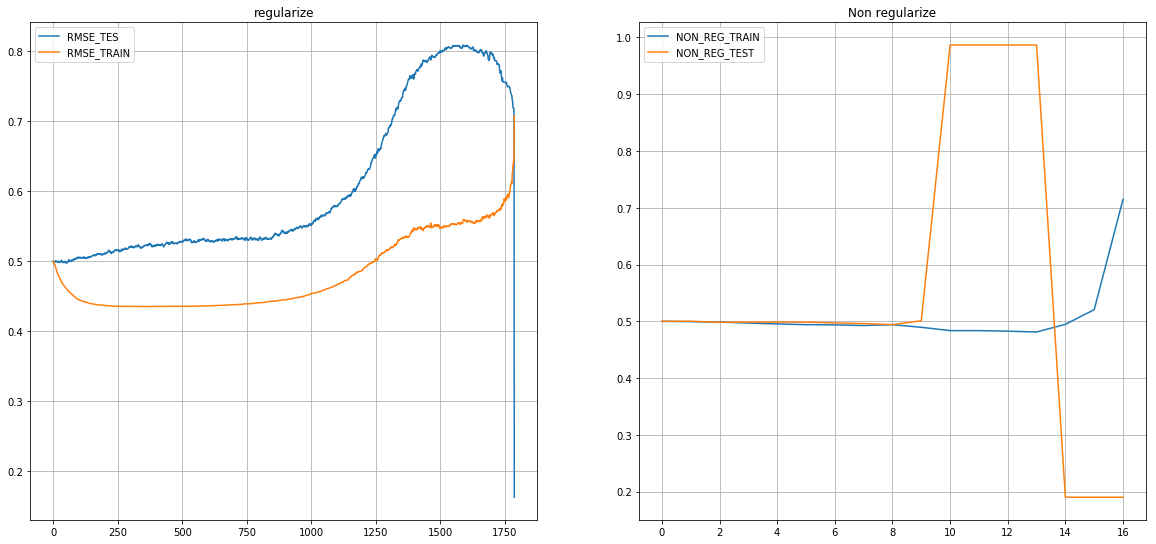

In [31]:
# plotint the result of the RMSE 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9.15))
 
lists =  rmse_test.items() 
x, y = zip(*lists)
lists1 =  rmse_train.items() 
x1, y1 = zip(*lists1)
lists3 =  rmse_train1.items() 
x3, y3 = zip(*lists3)
lists4 =  rmse_test1.items() 
x4, y4 = zip(*lists4)
#lists2 =  to_plot.items() 
#x2, y2 = zip(*lists2)
ax[0].plot(x, y,label= 'RMSE_TES')
ax[0].plot(x1, y1,label= 'RMSE_TRAIN')
ax[1].plot(x3, y3,label= 'NON_REG_TRAIN')
ax[1].plot(x4, y4,label= 'NON_REG_TEST')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid()
ax[1].grid()
ax[0].title.set_text('regularize')
ax[1].title.set_text('Non regularize')



#### Using gradient   

In [32]:
# Line search 
def backtracking(x,y, btha, loss, grad, lam):
    alpha=0.2
    b=0.5
    mu =1 
    while loss(x,y,(btha - mu*grad), lam) > loss(x,y,btha,lam)-alpha*mu*np.dot(grad.T, grad):
        mu *=b
    return mu
 
def learn_logreg_GA_bactrack(X_train ,Y_train,X_test, Y_test , mu=0.001, lam=0, thresh=10**-6,epoch=1000, \
                             batchsize=5, intercep = True, btha_0=None, alpha=0.2,bt=0.5, backtrack=False):
    
    if intercep:                                     #adding the intercep to the X 
        ones = np.ones(X_train.shape[0]).reshape(-1,1)
        X_train    = np.hstack([ones, X_train])
        ones_tes = np.ones(X_test.shape[0]).reshape(-1,1)
        X_test    = np.hstack([ones_tes, X_test])
        
    try:
        Y_train.shape[1]
    except IndexError :
        Y_train = Y_train.reshape(-1,1)
    try:
        Y_test.shape[1]
    except IndexError :
        Y_test = Y_test.reshape(-1,1)
    if btha_0 == None:
        btha_0 = np.zeros(X_train.shape[1]).reshape(-1,1)
    
    t = 0
    rmse_train = {}
    rmse_test  = {}
    
    for ep in range(epoch):
        for x, y in minibatch(X_train, Y_train, batchsize):  # selecting the 
            loss_0 = loss_likelyhood(x,y,btha_0,lam)
            y_hat     = sigmoid(np.matmul(x, btha_0))
            grad      = np.dot(x.T, (y-y_hat)) + 2*lam*btha_0
            if backtrack:
                mu        = backtracking(x,y, btha_0,loss_likelyhood, grad,lam)
            btha_next = btha_0 + mu*grad
            loss_nex  = loss_likelyhood(x,y, btha_next, lam)
            
            rmse_test[t] = RMSE(Y_test, sigmoid(np.matmul(X_test, btha_0)))
            rmse_train[t]= RMSE(Y_train,sigmoid(np.matmul(X_train, btha_0)))
            btha_0 = btha_next
            
            t   += 1
             
    return btha_next, rmse_test, rmse_train, rmse_test[t-1][-1]

In [33]:
epoch = 200
minbatchsize = 50 
lern_rat = 0.01 
lamb = 0.1
lamb1 = 0
 
para_nex, rmse_test, rmse_train, to_plot = learn_logreg_GA_bactrack(X_train, Y_train, X_tes, Y_tes ,mu=lern_rat, \
                             epoch=epoch, batchsize=minbatchsize,\
                             intercep=True, lam=lamb)
para_nex1, rmse_test1, rmse_train1, to_plot1 = learn_logreg_GA_bactrack(X_train, Y_train, X_tes, Y_tes ,mu=lern_rat, \
                             epoch=epoch, batchsize=minbatchsize,\
                             intercep=True, lam=lamb1)

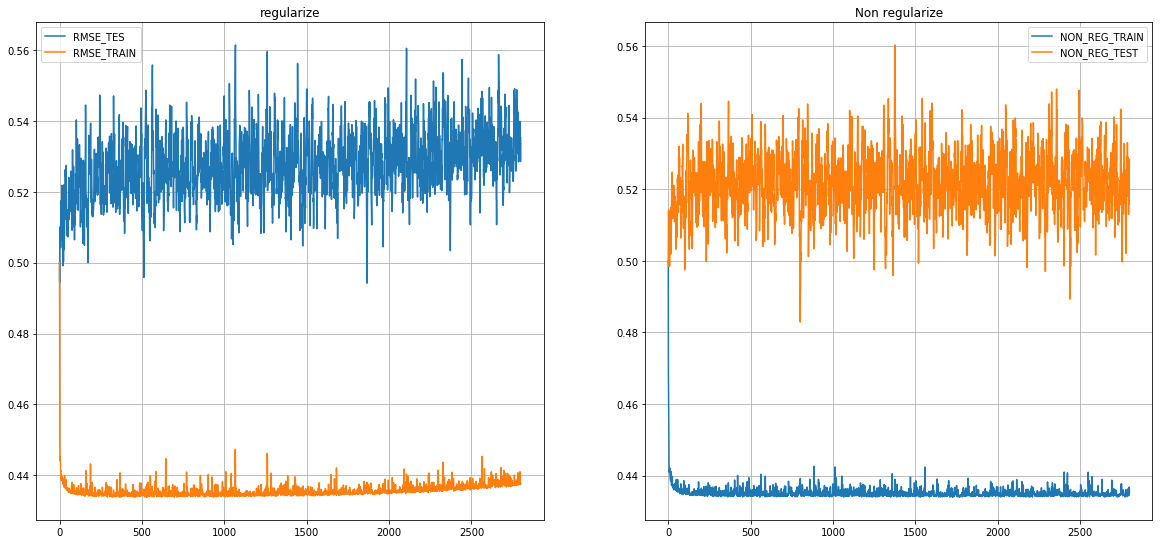

In [34]:
# plotint the result of the RMSE 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,9.15))
 
lists =  rmse_test.items() 
x, y = zip(*lists)
lists1 =  rmse_train.items() 
x1, y1 = zip(*lists1)
lists3 =  rmse_train1.items() 
x3, y3 = zip(*lists3)
lists4 =  rmse_test1.items() 
x4, y4 = zip(*lists4)
#lists2 =  to_plot.items() 
#x2, y2 = zip(*lists2)
ax[0].plot(x, y,label= 'RMSE_TES')
ax[0].plot(x1, y1,label= 'RMSE_TRAIN')
ax[1].plot(x3, y3,label= 'NON_REG_TRAIN')
ax[1].plot(x4, y4,label= 'NON_REG_TEST')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].title.set_text('regularize')
ax[1].title.set_text('Non regularize')
ax[0].grid()
ax[1].grid()


***Choosing deffferent value of alpha and lambda using fix learning rate***

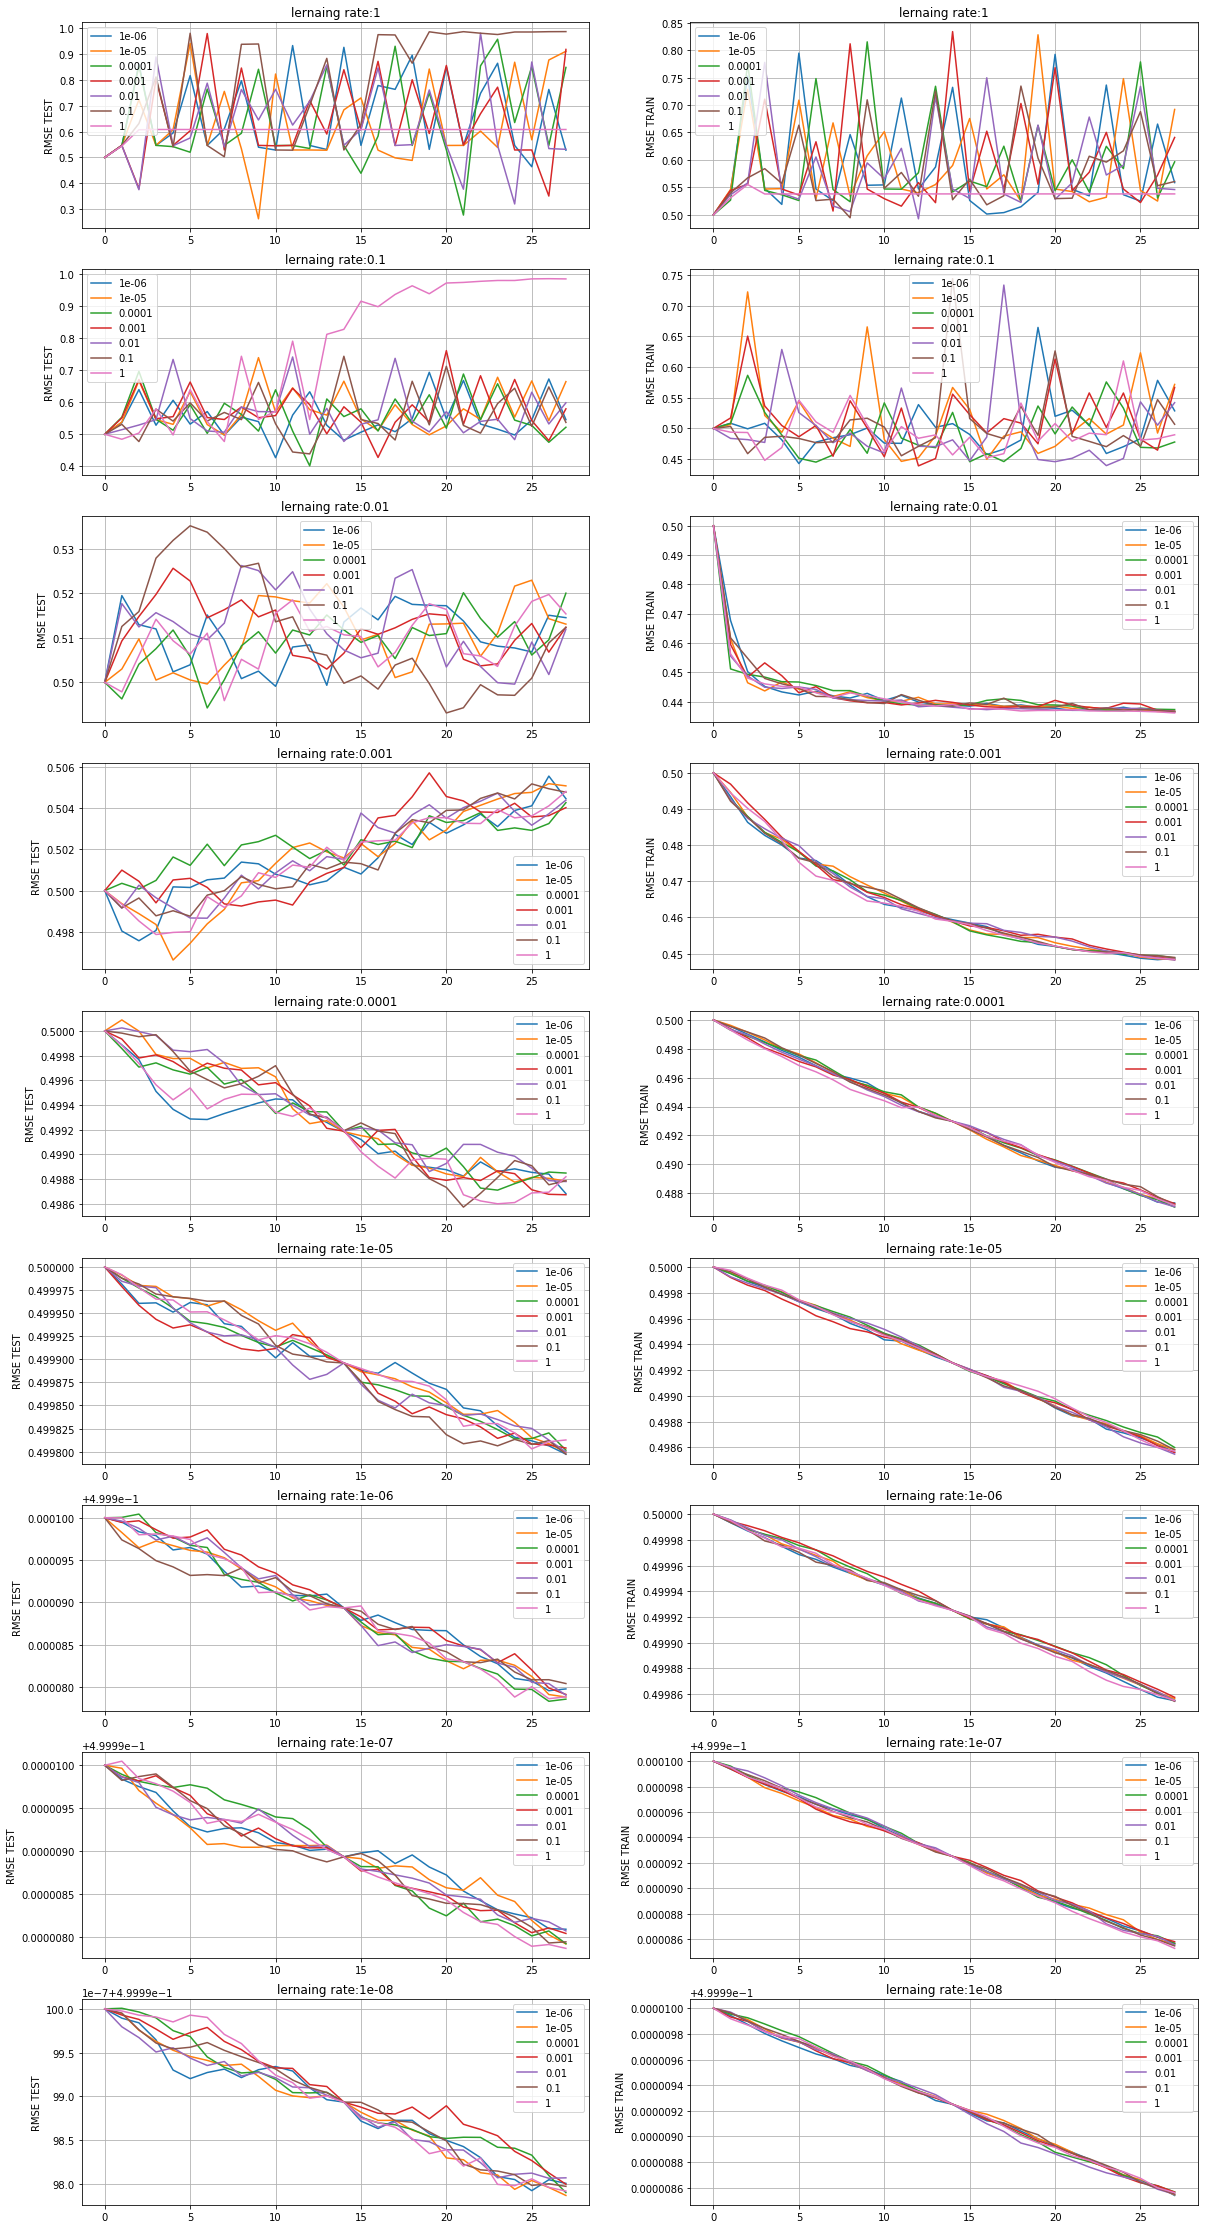

In [35]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(20,40.15))
lern_ra  = [10**-x for x in range(9)]       # i choose 5 step size 
minbatchsize = 50 
epoch = 2
lamb = [10**x for x in range(-6,1)]
t = 9
for lr in  lern_ra:
    for num, el in enumerate(lamb):
        para_nex, rmse_test, rmse_train, to_plot = learn_logreg_GA_bactrack(X_train, Y_train, X_tes, Y_tes ,mu=lr, \
                             epoch=epoch, batchsize=minbatchsize,\
                             intercep=True, lam=el)
        
        lists =  rmse_test.items() 
        lists1 =  rmse_train.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[9-t][0].plot(x, y, label=el)
        ax[9-t][0].title.set_text('lernaing rate:'+str(lr))
        ax[9-t][1].plot(x1, y1, label=el)
        ax[9-t][1].title.set_text('lernaing rate:'+str(lr))
        ax[9-t][0].legend(loc='best')
        ax[9-t][1].legend(loc='best')
        ax[9-t][1].grid()
        ax[9-t][0].grid()
        ax[9-t][1].set_ylabel("RMSE TRAIN")
        ax[9-t][0].set_ylabel("RMSE TEST")
    
    t-=1




***Choosing deffferent value of alpha and lambda using backtracking stesize controller ***

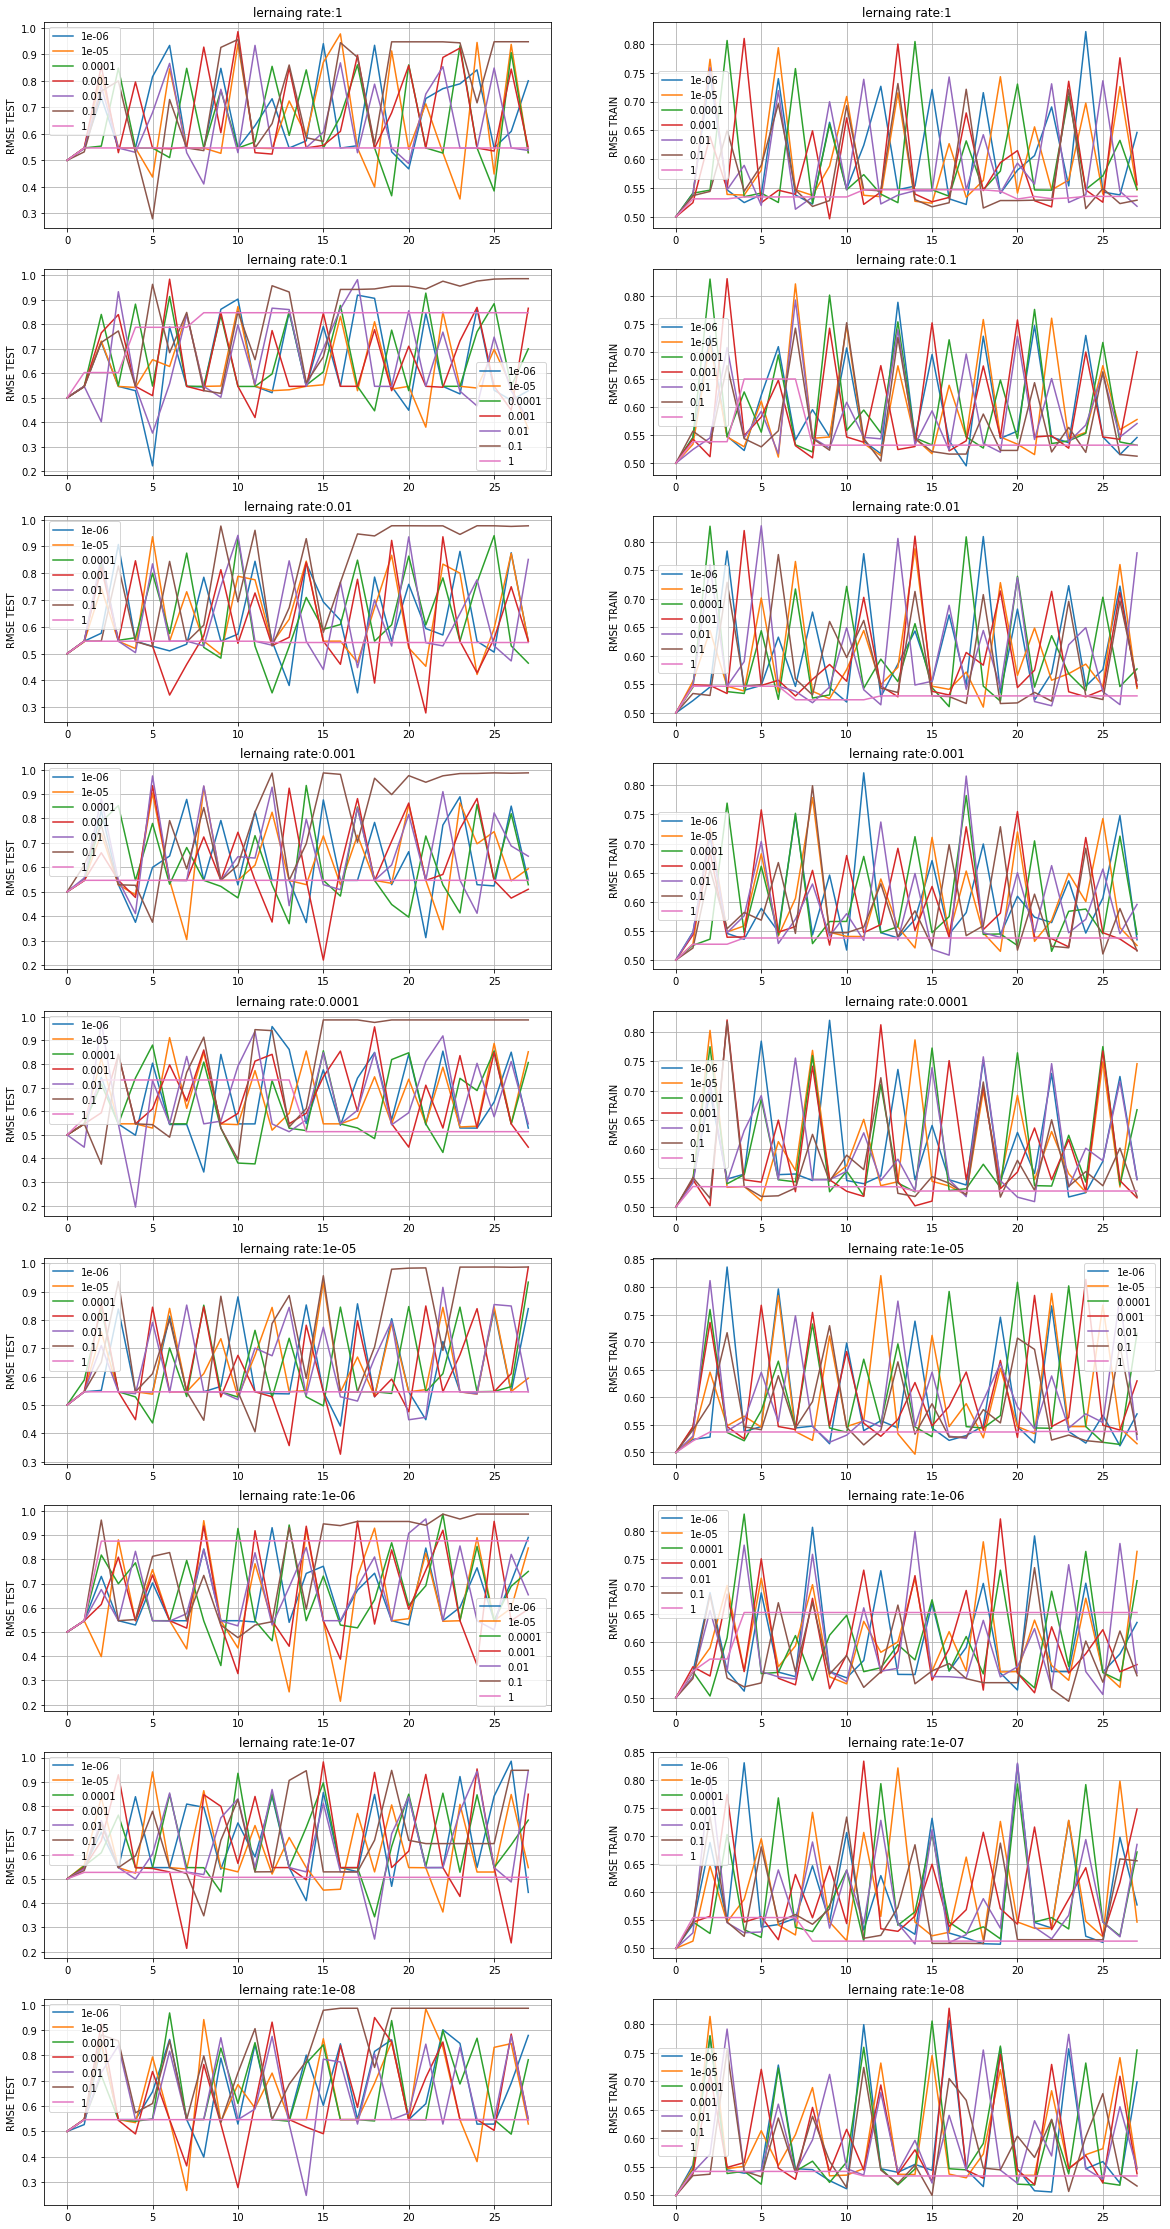

In [36]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(20,40.15))
lern_ra  = [10**-x for x in range(9)]       # i choose 5 step size 
minbatchsize = 50 
epoch = 2
lamb = [10**x for x in range(-6,1)]
t = 9
for lr in  lern_ra:
    for num, el in enumerate(lamb):
        para_nex, rmse_test, rmse_train, to_plot = learn_logreg_GA_bactrack(X_train, Y_train, X_tes, Y_tes ,mu=lr, \
                             epoch=epoch, batchsize=minbatchsize,\
                             intercep=True, lam=el, backtrack=True)
        
        lists =  rmse_test.items() 
        lists1 =  rmse_train.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[9-t][0].plot(x, y, label=el)
        ax[9-t][0].title.set_text('lernaing rate:'+str(lr))
        ax[9-t][1].plot(x1, y1, label=el)
        ax[9-t][1].title.set_text('lernaing rate:'+str(lr))
        ax[9-t][0].legend(loc='best')
        ax[9-t][1].legend(loc='best')
        ax[9-t][1].grid()
        ax[9-t][0].grid()
        ax[9-t][1].set_ylabel("RMSE TRAIN")
        ax[9-t][0].set_ylabel("RMSE TEST")
    
    t-=1





## Hyperparameter tuning and Cross validation

In [38]:
# I define K fold funciton 

def kfolder(x, y, model=None, modelparameters=None, alpha=0.1, lam=0,fold=10):
    """Yield minibacth with the given batchsizw, notice that   RMSE_TRAIN, RMSE_TEST
    are dictionairy insid of dictionary"""
    
    index = np.arange(0, len(y))   #a list of the dataset indexes 
    np.random.shuffle(index)
    folds = np.array_split(index, fold) # spliting the indexes among the number of fold
    
    RMSE_TEST = {}
    RMSE_TRAIN = {}
    LAS_RMSE_TEST = 0
    for f in range(fold):
        validation = folds[f]
        training_set = np.setdiff1d(index , validation)
        X_train, Y_train = x[np.array(training_set)], y[np.array(training_set)] 
        X_test, Y_test = x[np.array(validation)], y[np.array(validation)]
        # now training the nfold 
        Param, trainRMSE, testRMSE, RMSE_tes_last = model( X_train, Y_train,X_test, Y_test,**modelParameters, mu=alpha, lam=lam)
        RMSE_TEST[f]     = testRMSE
        RMSE_TRAIN[f]    = trainRMSE
        LAS_RMSE_TEST   += RMSE_tes_last

    return   Param,RMSE_TRAIN, RMSE_TEST, LAS_RMSE_TEST
    

In [39]:
from itertools import product 

# product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
# product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
# I wil use that to combine all possible paire wise combination 

def Gride_search(x_train, y_train, x_test, y_test, model, modelparameter, hyperParameters, 
               num_fold = 1 ):
    #inittialise the best parameters
    bes_score = None
    best_parameter = {}
    
    # now we generate parameters for the gride 
    
    hyperparam = set(product(*hyperParameters.values())) # putting all combination in the set as to enforce the uniquness
    hyperParameterKeys = hyperParameters.keys()
    
    t = 0
    fig, axs = plt.subplots(nrows=len(hyperparam), ncols=2, figsize=(20,10*len(hyperparam))) 
    
    # setting up for 3D ploting                            
    fig1 = plt.figure(figsize=(20,10))
    axd = fig1.add_subplot(111, projection='3d')


    """Perform grid search with cross validation"""
    
    for alpha, lam in hyperparam:
        param, RMSE_TRAIN, RMSE_TEST, LAS_RMSE_TEST = kfolder(x_train, y_train, model, modelparameter, alpha, lam, num_fold )  

        # storing the best hyperparameters
        avg_best =  LAS_RMSE_TEST/num_fold     # avereging the RMSE on the test 
        if bes_score == None or avg_best < bes_score:
            bes_score = avg_best
            best_parameter['alpha'] = alpha 
            best_parameter['lam']   = lam 
            best_parameter['btha']  =  param 

        for k in range(num_fold):
            lists =  RMSE_TEST[k].items() 
            lists1 =  RMSE_TRAIN[k].items() 
            x, y = zip(*lists)
            x1, y1 = zip(*lists1)
            axs[t][0].plot(x,y, label = "Fold-" + str(k))
            axs[t][1].plot(x1,y1, label = "Fold-" + str(k))
            axs[t][0].legend()
            axs[t][1].legend()
            axs[t][0].grid()
            axs[t][1].grid()
            axs[t][0].set_title("Train-α="+ str(alpha)+'λ='+str(lam))
            axs[t][1].set_title("Validation" + str(alpha)+'λ='+str(lam))


        t += 1
            #Keep tracking of mean performance (i.e. RMSE value) across k−folds for each set of hyperparameters.
                           
        axd.scatter(alpha, lam, avg_best, marker = '^', label = str(alpha)+'λ='+str(lam))

        axd.set_xlabel('alpha')
        axd.set_ylabel('lambda')
        axd.set_zlabel('fold_RMSE')
        axd.legend()
        axd.view_init(60, 35)

    #lastly run the the model with the best 
    lr = best_parameter['alpha']
    lam = best_parameter['lam'] 
    plotHeight = 10
    plotWidth = 20
    fig2, ax = plt.subplots(1, 2, figsize = (plotWidth, plotHeight)) 
    _, RMSE_TRAIN, RMSE_TEST, LAS_RMSE_TEST = model(x_train, y_train, x_test, y_test, **modelparameter, mu= lr, lam=lam) 
                   
    lists =  RMSE_TEST.items() 
    lists1 =  RMSE_TRAIN.items() 
    x, y = zip(*lists)
    x1, y1 = zip(*lists1)
    ax[0].plot(x,y, label = "RMSE TES FOR" + str(alpha)+'λ='+str(lam))
    ax[0].legend()
    ax[0].grid()
    ax[1].plot(x1,y1, label = "RMSE TRAIN FOR" + str(alpha)+'λ='+str(lam))
    ax[1].legend()
    ax[1].grid()
    plt.suptitle("Best model")

    return bes_score, best_parameter

#### gride search with Newton method
Note For the sake of file size i reduce the number of parameters 

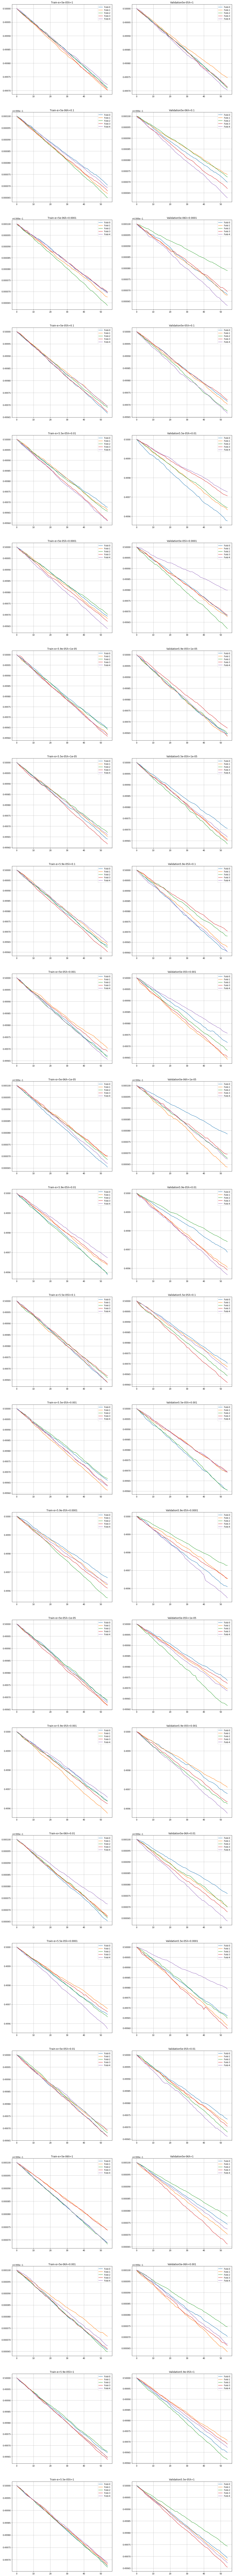

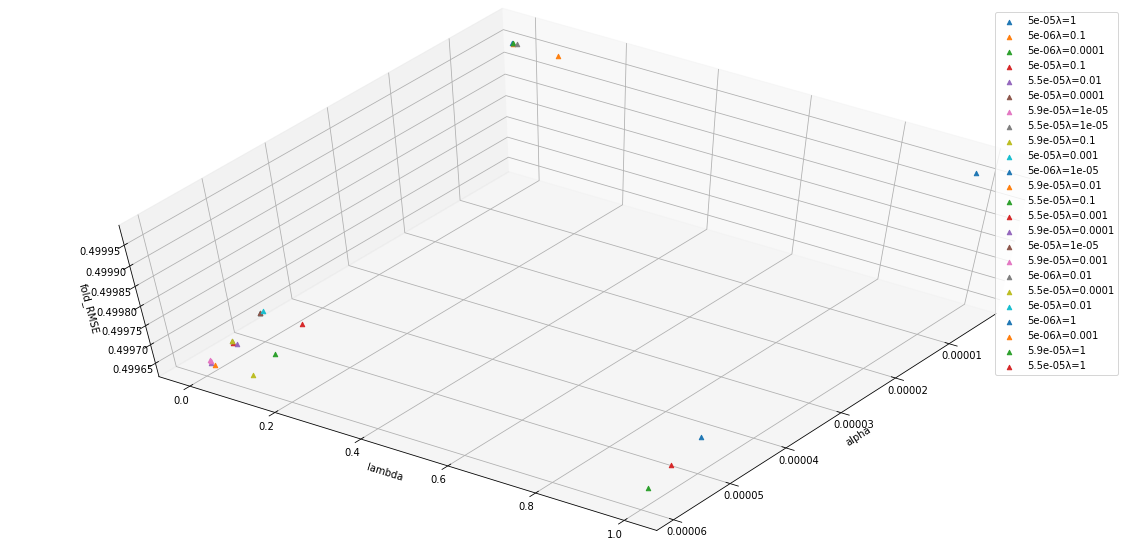

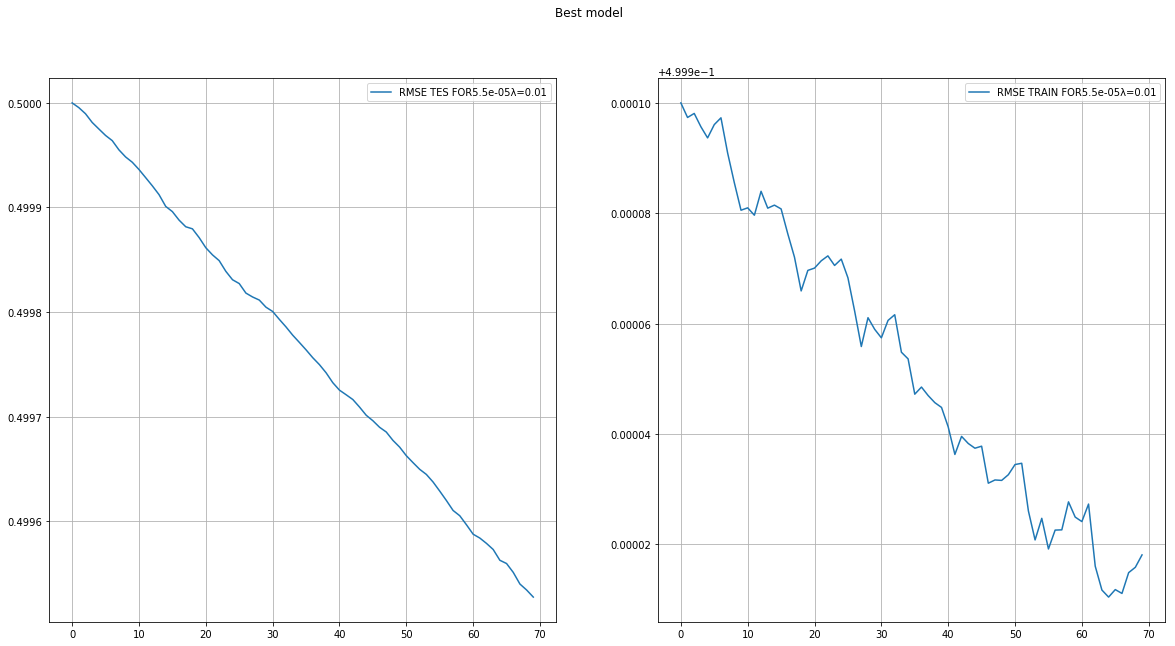

In [40]:
lamb = [10**x for x in range(-5,1)]

hyperparameters = {
    "mu":[5.0e-5, 5.5e-5, 5.9e-5, 5.0e-6 ],
    "lam": lamb
}


modelParameters = {
    "epoch":5, 
    "batchsize":50 
     }
    
model, hyperParams = Gride_search(X_train, Y_train, X_tes, Y_tes,minimize_newton, modelParameters,\
                                  hyperparameters, num_fold=5)



#### gride search with Gradient descent 
For a fix step lenpht 

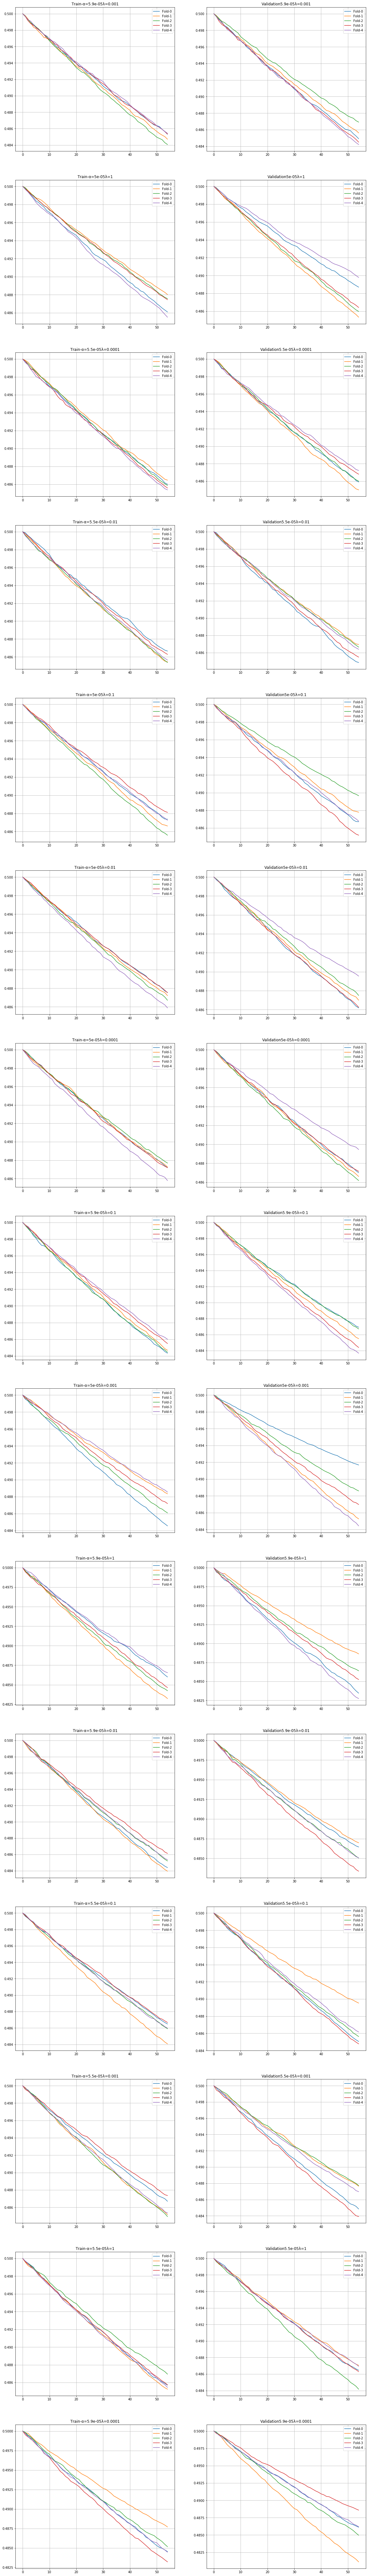

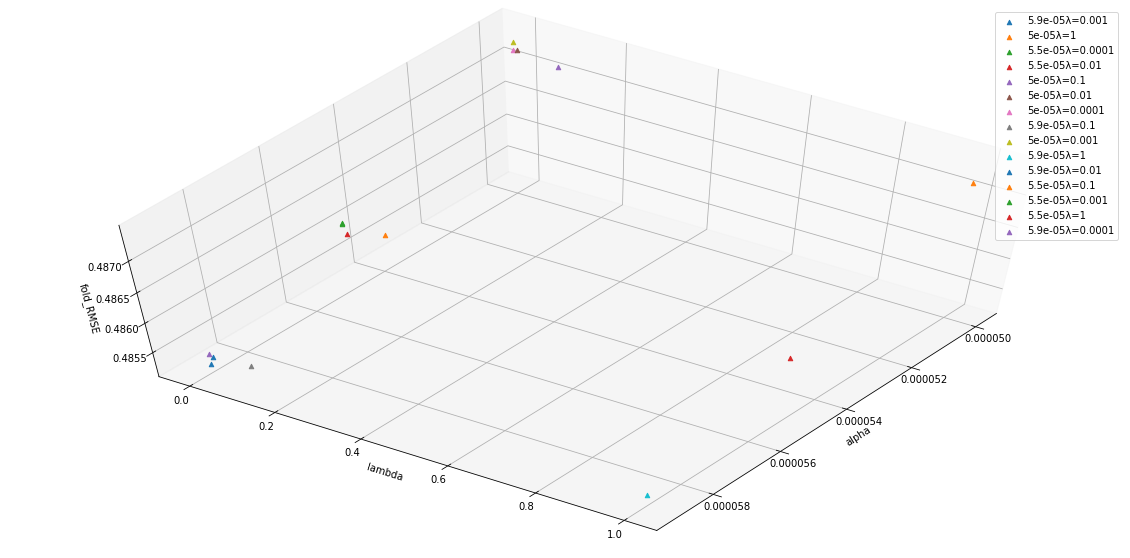

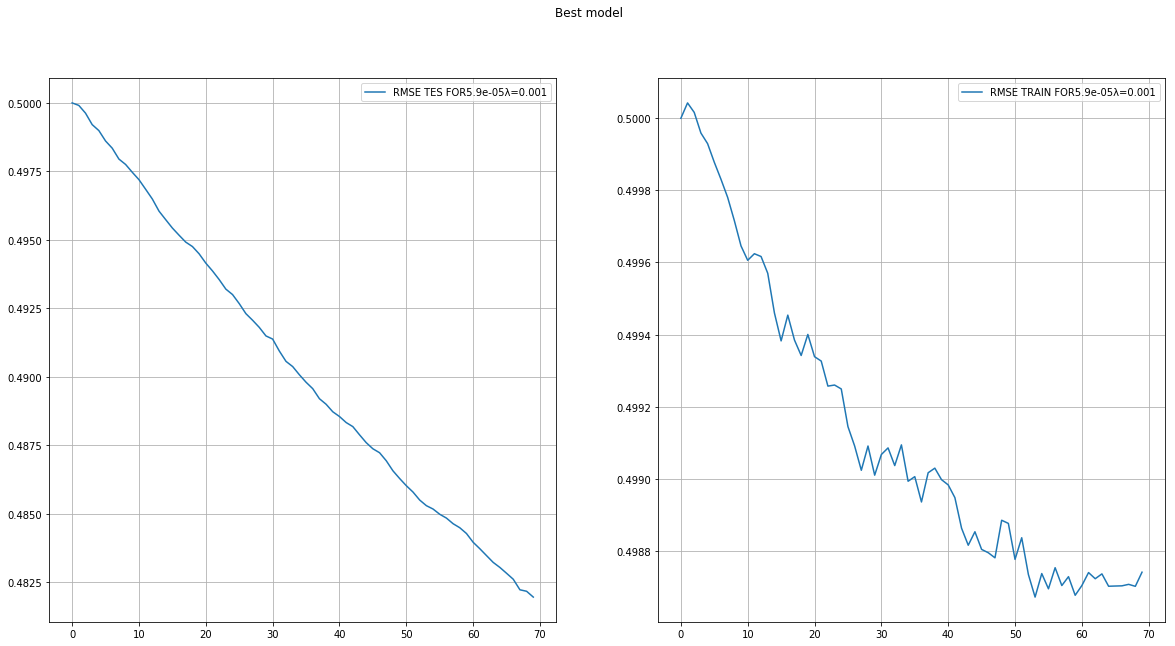

In [41]:
lamb = [10**x for x in range(-4,1)]

hyperparameters = {
    "mu":[5.0e-5, 5.5e-5, 5.9e-5 ],
    "lam": lamb
}


modelParameters = {
    "epoch":5, 
    "batchsize":50 
     }
    
model, hyperParams = Gride_search(X_train, Y_train, X_tes, Y_tes,learn_logreg_GA_bactrack, modelParameters,\
                                  hyperparameters, num_fold=5)



In [42]:
lamb = [10**x for x in range(-7,1)]

hyperparameters = {
    "mu":[5.0e-5, 5.5e-5, 5.9e-5, 5.0e-6, 5.5e-7, 5.9e-8],
    "lam": lamb
}


modelParameters = {
    "epoch":10, 
    "batchsize":50, 
    'backtrack':True}
    
model, hyperParams = Gride_search(X_train, Y_train, X_tes, Y_tes,learn_logreg_GA_bactrack, modelParameters,\
                                  hyperparameters, num_fold=5)




In [73]:
def chec_prdiction(x, best_btha):
    ones = np.ones(x.shape[0]).reshape(-1,1)
    x    = np.hstack([ones, x])
    tmp  = np.dot(x, best_btha)
    result = np.vectorize(lambda x: 1 if x <=0.5 else 0)
    
    return result(sigmoid(tmp))

In [77]:
result = chec_prdiction(X_tes, hyperParams['btha'])
predit_df = pd.DataFrame({'true':Y_tes, 'predicted':result.flatten()})


In [75]:
predit_df['predicted'].value_counts()

0    3358
1      39
Name: predicted, dtype: int64

In [76]:
predit_df['true'].value_counts()

0    3307
1      90
Name: true, dtype: int64

In [78]:
predit_df.head(100)

true  predicted
0      0          0
1      0          0
2      0          0
3      0          0
4      0          0
5      0          0
6      0          0
7      0          0
8      0          0
9      0          0
10     0          0
11     0          0
12     0          1
13     0          0
14     0          0
15     0          0
16     0          0
17     0          0
18     0          0
19     0          0
20     0          0
21     0          0
22     0          0
23     0          0
24     0          0
25     0          0
26     0          0
27     0          0
28     0          0
29     0          0
..   ...        ...
70     0          0
71     0          0
72     0          0
73     0          0
74     0          0
75     0          0
76     0          0
77     0          0
78     0          0
79     0          0
80     0          0
81     0          0
82     0          0
83     0          0
84     0          0
85     0          0
86     0          0
87     0          0
88     0          0
89     0          0
90     1          0
91     1          0
92     1          0
93     1          0
94     1          0
95     1          0
96     1          0
97     1          0
98     1          0
99     1          0

[100 rows x 2 columns]